In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('../../타이타닉/train.csv', encoding='utf-8')
df_test = pd.read_csv('../../타이타닉/test.csv', encoding='utf-8')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


- PassengerID : 탑승객 고유 아이디
- Survival : 탑승객 생존 유무 (0: 사망, 1: 생존)
- Pclass : 등실의 등급
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수
- Parch : 함께 탐승한 부모, 자식의 수
- Ticket :티켓 번호
- Fare : 티켓의 요금
- Cabin : 객실번호
- Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1. 데이터의 결측치를 확인

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# age 변수의 결측치는 평군값으로 대체
# cabin 는 결측치가 너무 많으므로 drop
# embarked 의 경우 2개의 결측치 존재 -> 행 삭제

# df['Age'] = df['Age'].fillna(df['Age'].mean())
df = df.drop(['Cabin'], axis=1)
df = df.dropna()

### 1-1. Age 변수

<AxesSubplot:>

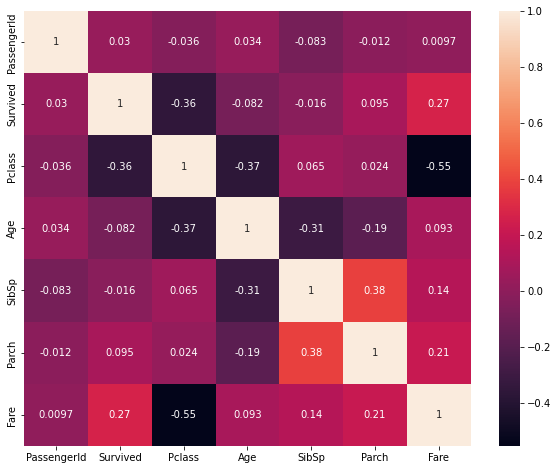

In [7]:
# 각 변수와 age 변수의 상관관계
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

- Age 변수는 Pclass, SibSp 변수들과 약한 음의 상관관계를 가진다고 볼 수 있다.  
= Pclass, SibSp 이 높으면 Age는 낮다.

#### Pclass별 Age의 통계량

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

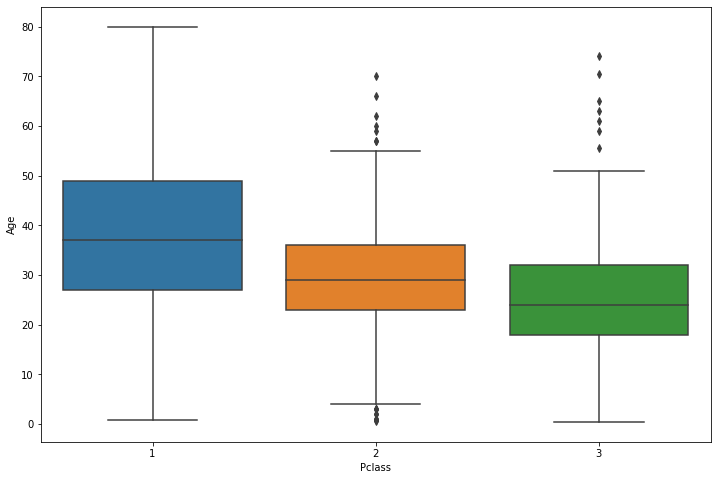

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass', y='Age', data=df)

In [9]:
for i in df['Pclass'].unique():
    temp = df[df['Pclass'] == i]['Age']
    print('Pclass = ', i)
    print(temp.describe(), end='\n\n')
print('Total')
print(df['Age'].describe())

Pclass =  3
count    355.000000
mean      25.140620
std       12.495398
min        0.420000
25%       18.000000
50%       24.000000
75%       32.000000
max       74.000000
Name: Age, dtype: float64

Pclass =  1
count    184.000000
mean      38.105543
std       14.778904
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64

Pclass =  2
count    173.000000
mean      29.877630
std       14.001077
min        0.670000
25%       23.000000
50%       29.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64

Total
count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


- Pclass 별로 Age의 평균치가 달라진다  
= 표준편차도 유사하므로 Pclass를 기준으로 Age 결측치를 처리하면 될 듯
- min값으로 확인했을 때, Age가 0 미만의 소수점으로 존재하는 사람들이 있다

#### 결측치 처리

In [10]:
df['Age'] = np.where(pd.notnull(df['Age'])==True, df['Age'], df['Pclass'].apply(lambda x:df[df['Pclass']==x]['Age'].mean()))
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S


#### 특이값 확인

In [11]:
weird = []

for i in df['Age']:
    temp_st = str(i)
    temp_a = temp_st.split('.')[-1]
    if len(temp_a) != 2:
        continue
    if temp_a != '00':
        print(i, end=' ')
        weird.append(float(i))

0.83 0.92 0.75 0.75 0.67 0.42 0.83 

- 소수점으로 존재하는 age는 전부 0.xx 로 존재한다.
- 정확한 나이를 확인하기 위해 해당 데이터들을 전부 출력

In [12]:
df[df['Age'].isin(weird)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


- Name 변수에서 확인할 수 있듯, Master의 경우 남자 어린아이를 의미한다.
- 따라서 0.xx의 나이는 영유아를 의미함을 알 수 있다.

#### age 변수 Binning

In [13]:
df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### 4분위수에 맞춰서 Binning
1. 0~20
2. 20~28
3. 28~38
4. 38~

In [14]:
age = []

for i in df['Age']:
    if i < 20:
        age.append(1)
    elif i >= 20 and i < 28:
        age.append(2)
    elif i >= 28 and i < 38:
        age.append(3)
    elif i >= 38:
        age.append(4)
        
df['age_new'] = age

### SibSp 변수와 Parch 변수를 합쳐 tot_fam 변수로 생성

In [15]:
df['tot_fam'] = df['SibSp']+df['Parch']
df['tot_fam'] = df['tot_fam'].astype(int)
df.info()
# df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
 11  age_new      712 non-null    int64  
 12  tot_fam      712 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 91.3+ KB


#### Name 변수에서 필요한 호칭만 추출

In [16]:
df['Name'] = df['Name'].apply(lambda x:(x.split(',')[1]).split('.')[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_new,tot_fam
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,S,2,1
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C,4,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,S,2,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,S,3,1
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,S,3,0


### 2. 각 Feature에 따른 생존률을 계산

In [17]:
def feature_surv(data, feature):
    uni = data[feature].unique().tolist()
    
    result = {}
    for i in uni:
        temp = data[data[feature]==i]['Survived']
        perc_surv = temp.sum()/len(temp)
        result[i] = np.round(perc_surv, 4)
    result = dict(sorted(result.items()))
    print(result)
    return result

In [18]:
features = df.columns.tolist()
features = [i for i in features if i not in ['PassengerId', 'Survived', 'Age', 
                                             'Fare', 'Ticket']]

for i in features:
    print(i, ': ', end='')
    result = feature_surv(df, i)

Pclass : {1: 0.6522, 2: 0.4798, 3: 0.2394}
Name : {' Capt': 0.0, ' Col': 0.5, ' Don': 0.0, ' Dr': 0.5, ' Jonkheer': 0.0, ' Lady': 1.0, ' Major': 0.5, ' Master': 0.5833, ' Miss': 0.7172, ' Mlle': 1.0, ' Mme': 1.0, ' Mr': 0.1683, ' Mrs': 0.785, ' Ms': 1.0, ' Rev': 0.0, ' Sir': 1.0, ' the Countess': 1.0}
Sex : {'female': 0.7529, 'male': 0.2053}
SibSp : {0: 0.3689, 1: 0.5301, 2: 0.44, 3: 0.3333, 4: 0.1667, 5: 0.0}
Parch : {0: 0.3545, 1: 0.5545, 2: 0.5735, 3: 0.6, 4: 0.0, 5: 0.2, 6: 0.0}
Embarked : {'C': 0.6077, 'Q': 0.2857, 'S': 0.3628}
age_new : {1: 0.4817, 2: 0.3584, 3: 0.4127, 4: 0.371}
tot_fam : {0: 0.3184, 1: 0.5468, 2: 0.5699, 3: 0.7778, 4: 0.2727, 5: 0.1364, 6: 0.3333, 7: 0.0}


### 2-2. 내용을 도식화

{1: 0.6522, 2: 0.4798, 3: 0.2394}
{' Capt': 0.0, ' Col': 0.5, ' Don': 0.0, ' Dr': 0.5, ' Jonkheer': 0.0, ' Lady': 1.0, ' Major': 0.5, ' Master': 0.5833, ' Miss': 0.7172, ' Mlle': 1.0, ' Mme': 1.0, ' Mr': 0.1683, ' Mrs': 0.785, ' Ms': 1.0, ' Rev': 0.0, ' Sir': 1.0, ' the Countess': 1.0}
{'female': 0.7529, 'male': 0.2053}
{0: 0.3689, 1: 0.5301, 2: 0.44, 3: 0.3333, 4: 0.1667, 5: 0.0}
{0: 0.3545, 1: 0.5545, 2: 0.5735, 3: 0.6, 4: 0.0, 5: 0.2, 6: 0.0}
{'C': 0.6077, 'Q': 0.2857, 'S': 0.3628}
{1: 0.4817, 2: 0.3584, 3: 0.4127, 4: 0.371}
{0: 0.3184, 1: 0.5468, 2: 0.5699, 3: 0.7778, 4: 0.2727, 5: 0.1364, 6: 0.3333, 7: 0.0}


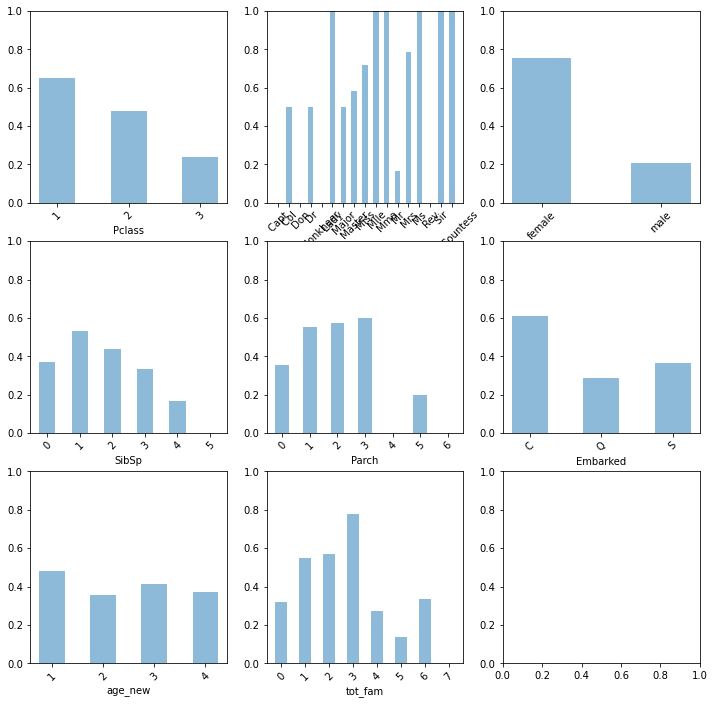

In [19]:
fig, ax = plt.subplots(3,3, figsize=(12,12))

for idx, i in enumerate(features):
    axx = plt.subplot(3,3,idx+1)
    result = feature_surv(df, i)
    axx.bar(np.arange(len(result.keys())), result.values(), width=0.5, alpha=0.5)
    axx.set_xticks(np.arange(len(result.keys())))
    axx.set_xticklabels(result.keys(), rotation=45)
    axx.set_xlabel(i)
    axx.set_ylim([0,1])

#     axx.hist(result)

tot_fam 변수를 확인했을 때, 범주를 구분할 필요가 있어 보인다.
- tot_fam = 0
- tot_fam < 4
- tot_fam > 4  

이렇게 3가지 경우로 범주를 구분한다.

In [20]:
for row in df.index:
    if df.loc[row, 'tot_fam'] == 0:
        df.loc[row, 'tot_family'] = 'S'
    elif (df.loc[row, 'tot_fam'] >= 1) & (df.loc[row, 'tot_fam'] < 4):
        df.loc[row,'tot_family'] = 'M'
    else:
        df.loc[row, 'tot_family'] = 'L'
        
df = df.drop(['tot_fam', 'SibSp', 'Parch'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,age_new,tot_family
0,1,0,3,Mr,male,22.0,A/5 21171,7.2500,S,2,M
1,2,1,1,Mrs,female,38.0,PC 17599,71.2833,C,4,M
2,3,1,3,Miss,female,26.0,STON/O2. 3101282,7.9250,S,2,S
3,4,1,1,Mrs,female,35.0,113803,53.1000,S,3,M
4,5,0,3,Mr,male,35.0,373450,8.0500,S,3,S


<AxesSubplot:xlabel='tot_family'>

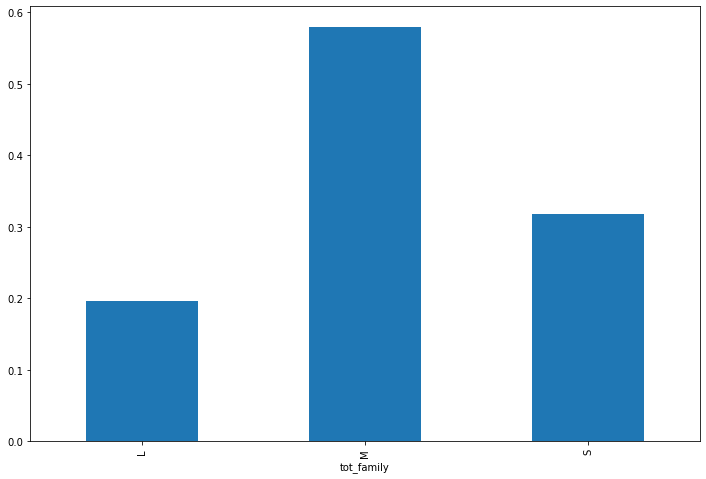

In [21]:
plt.figure(figsize=(12,8))
df.groupby('tot_family').mean()['Survived'].plot.bar()

- 대가족의 경우 생존률이 낮음
- 가족 사이즈가 M일 경우 생존률이 더 높다

### 3. 범주형 변수들을 Label Encoding을 통해 정리

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,age_new,tot_family
0,1,0,3,Mr,male,22.0,A/5 21171,7.2500,S,2,M
1,2,1,1,Mrs,female,38.0,PC 17599,71.2833,C,4,M
2,3,1,3,Miss,female,26.0,STON/O2. 3101282,7.9250,S,2,S
3,4,1,1,Mrs,female,35.0,113803,53.1000,S,3,M
4,5,0,3,Mr,male,35.0,373450,8.0500,S,3,S


In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

category = ['Name', 'Sex', 'Embarked', 'tot_family']
enc = LabelEncoder()
# enc = OneHotEncoder()
for feature in category:
    enc.fit(df[feature])
    print(feature, ':', enc.classes_, end=' => ')
    df[feature] = enc.transform(df[feature])
    print([i for i in range(len(enc.classes_))])

    
# PassengerId 변수는 제외
# Ticket 변수의 경우 목적변수와 상관성이 없다고 생각하고 drop
# Age 변수의 경우 정확한 나이 보다 범주형인 age_new로 변수 치환하였으므로 drop
x = df.drop(['PassengerId','Survived', 'Age', 'Ticket'], axis=1)
y = df['Survived']

x.head()

Name : [' Capt' ' Col' ' Don' ' Dr' ' Jonkheer' ' Lady' ' Major' ' Master'
 ' Miss' ' Mlle' ' Mme' ' Mr' ' Mrs' ' Ms' ' Rev' ' Sir' ' the Countess'] => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
Sex : ['female' 'male'] => [0, 1]
Embarked : ['C' 'Q' 'S'] => [0, 1, 2]
tot_family : ['L' 'M' 'S'] => [0, 1, 2]


,Pclass,Name,Sex,Fare,Embarked,age_new,tot_family
0,3,11,1,7.2500,2,2,1
1,1,12,0,71.2833,0,4,1
2,3,8,0,7.9250,2,2,2
3,1,12,0,53.1000,2,3,1
4,3,11,1,8.0500,2,3,2


### 4. PCA 실행

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

x = pca.fit_transform(x)
x = pd.DataFrame(data=x)

pca.explained_variance_ratio_

array([9.97701837e-01, 1.34472996e-03, 4.20821976e-04])

### 4.1 생존여부 예측 모델을 생성

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [26]:
from sklearn.metrics import roc_auc_score, accuracy_score

params = {'max_depth':[10, 13, 15, 17, 19],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4, 5],
          'max_leaf_nodes': [10, 15, 20]}

model = RandomForestClassifier(random_state=1)
gs = GridSearchCV(model, params, scoring='f1', cv=5)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 13, 15, 17, 19],
                         'max_leaf_nodes': [10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='f1')

In [27]:
# gridsearch 결과 시각화
scores_df = pd.DataFrame(gs.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]
# scores_df

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...",0.719607,211,0.641975,0.779221,0.750000
1,"{'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...",0.718041,236,0.634146,0.779221,0.750000
2,"{'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...",0.721563,186,0.641975,0.779221,0.750000
3,"{'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...",0.723597,181,0.634146,0.779221,0.750000
4,"{'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...",0.716991,241,0.625000,0.773333,0.750000
...,...,...,...,...,...,...
295,"{'max_depth': 19, 'max_leaf_nodes': 20, 'min_s...",0.734141,111,0.632911,0.800000,0.782609
296,"{'max_depth': 19, 'max_leaf_nodes': 20, 'min_s...",0.742655,16,0.658228,0.810811,0.818182
297,"{'max_depth': 19, 'max_leaf_nodes': 20, 'min_s...",0.742655,16,0.658228,0.810811,0.818182
298,"{'max_depth': 19, 'max_leaf_nodes': 20, 'min_s...",0.742655,16,0.658228,0.810811,0.818182


### 4.2 test 데이터셋에 대한 모델 결과를 시각화

In [28]:
print('best parmas : ', gs.best_params_)
# print('best score : ', gs.best_score_)

best_grid = gs.best_estimator_
y_pred = best_grid.predict(x_test)
train_pred = best_grid.predict(x_train)

print('< train >')
print('roc_auc : ', roc_auc_score(y_train, train_pred))
print('accuracy : ', accuracy_score(y_train, train_pred), '\n')

print('< test >')
print('roc_auc : ', roc_auc_score(y_test, y_pred))
print('accuracy : ', accuracy_score(y_test, y_pred))

best parmas :  {'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}
< train >
roc_auc :  0.8625548245614035
accuracy :  0.8784067085953878 

< test >
roc_auc :  0.7301408872901678
accuracy :  0.7531914893617021


< train >  
roc_auc :  0.8478344298245614  
accuracy :  0.8679245283018868   

< test >  
roc_auc :  0.7669739208633093  
accuracy :  0.7872340425531915  
==== 이번 결과 ====  
< train >   
roc_auc :  0.8400219298245613  
accuracy :  0.8616352201257862   

< test >  
roc_auc :  0.7861960431654677  
accuracy :  0.8042553191489362  
==== ====

### 수정 전보다 train 데이터에 대한 성능은 올라갔으나 test 데이터에서는 낮은 점수를 보임


#### 변수를 추가한게 과적합의 원인이 되었다고 판단.
- PCA를 통한 차원축소 후 결과 비교

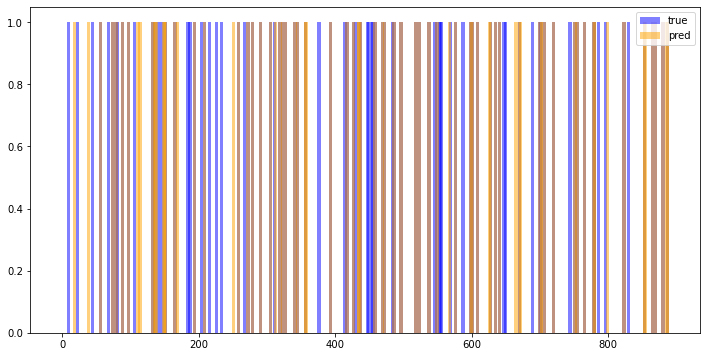

In [29]:
plt.figure(figsize=(12,6))
plt.bar(y_test.index, y_test, label='true', color='blue', width=5, alpha=0.5)
plt.bar(y_test.index, y_pred, label='pred', color='orange', width=5, alpha=0.5)
plt.legend(loc='upper right')
plt.show()

### 남/녀 탑승객 수를 pclass 1~3등급에 따라 시각화

In [30]:
bonus = df.groupby(['Sex', 'Pclass'])['Survived'].count()
bonus

Sex  Pclass
0    1          83
     2          74
     3         102
1    1         101
     2          99
     3         253
Name: Survived, dtype: int64

[Text(1.5, 0, '남'), Text(3.5, 0, '여')]

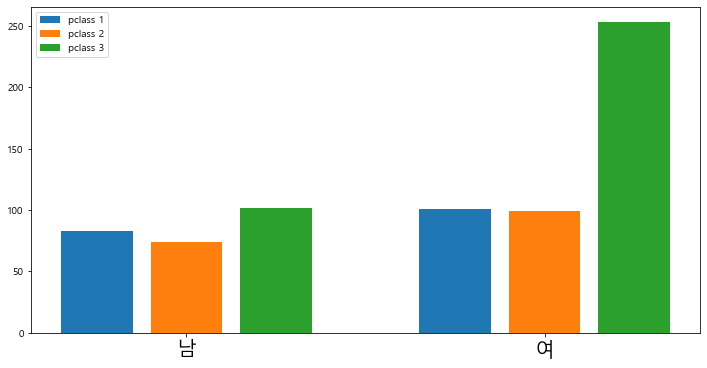

In [31]:
plt.rc('font', family='Malgun Gothic')

index1 = [1, 3]
index2 = [1.5, 3.5]
index3 = [2, 4]

ax, fig = plt.subplots(1,1, figsize=(12,6))
axx = plt.subplot(111)
axx.bar(index1, bonus[:,1], width=0.4, label='pclass 1')
axx.bar(index2, bonus[:,2], width=0.4, label='pclass 2')
axx.bar(index3, bonus[:,3], width=0.4, label='pclass 3')
axx.legend(loc='upper left')

axx.set_xticks(index2)
axx.set_xticklabels(['남', '여'], fontsize=20)